# Analisi dei disastri aerei dal 1919 al 2023

Il presente notebook raccoglie i risultati dell'analisi effettuata su richiesta della IASS (International Alliance for Safe Skies). L'analisi ha riguardato i disastri aerei dal 1919 al 2023 ed è stata effettuata sulla base di dati forniti dalla stessa associazione che ha richiesto il progetto.

La prima sezione è dedicata all'importazione e alla preparazione dei dati e all'individuazione di quei record che presentano valori incompleti. Dopo aver dedicato una sezione all'esplorazione dei dati parziali, le quattro sezioni successive saranno dedicate all'analisi dei parametri scelti per lo svolgimento del progetto.

## Importazione e preparazione dei dati

In questa sezione saranno importati i dati forniti dall'IASS e saranno individuati i record contenenti dati incompleti.

Il primo passo è stato importare la tabella dal file CSV fornito [a questo link](https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv), di cui si mostrano le prime e le ultime righe.

In [ ]:
import pandas as pd

df=pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv")
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


L'analisi sarà effettuata considerando le seguenti colonne:
- La colonna *date* riporta la data del disastro;
- Le colonne *type* e *operator* forniscono informazioni sul tipo di velivolo e sulla compagnia a cui appartiene;
- La colonna *fatalities* riporta il numero di vittime;
- La colonna *country* riporta il paese in cui è avvenuto il disastro;
- La colonna *cat* indica la categoria di disastro secondo l'ASN.

Le colonne sopra elencate sono state mantenute, mentre le altre sono state eliminate.

In [ ]:
df=df[["date","type","operator","fatalities","country","cat"]]
df

,date,type,operator,fatalities,country,cat
0,date unk.,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1
1,date unk.,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1
2,date unk.,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1
3,date unk.,Antonov An-12BK,Soviet AF,NaN,Russia,A1
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1
...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2


Iniziamo dalle metriche che saranno utilizzate nel corso dell'analisi.

La prima metrica è, naturalmente, il numero di incidenti. Per facilitare i raggruppamenti nelle prossime sezioni, si è deciso di aggiungere la colonna *accidents* che ha valore uguale a 1.

In [ ]:
df["accidents"]=1
df

<ipython-input-3-c5ca62bc2a45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["accidents"]=1


,date,type,operator,fatalities,country,cat,accidents
0,date unk.,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,1
1,date unk.,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,1
2,date unk.,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,1
3,date unk.,Antonov An-12BK,Soviet AF,NaN,Russia,A1,1
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1,1
...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,1
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,1
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,1
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,1


La seconda metrica è il numero di vittime, rappresentato dalla colonna *fatalities*.

Nel corso dell'esplorazione di questa colonna sono emersi due fattori:
- La presenza di valori vuoti;
- La presenza di alcuni valori riportati come somma.

Entrambi i fattori sono verificabili dalla cella seguente, dove sono stati estratti i valori unici della colonna *fatalities*.

In [ ]:
df["fatalities"].unique()

array([nan, '0', '14', '1', '4', '2', '5', '6', '3', '7', '5+ 1', '8',
       '16', '12', '9', '15', '14+ 1', '10', '11', '35+ 9', '13', '2+ 2',
       '17', '19', '20', '0+ 1', '18', '13+ 1', '25', '29', '23', '5+ 7',
       '24', '36', '26', '22', '27', '12+ 1', '21', '7+ 6', '35', '32',
       '31', '2+ 1', '34', '28', '20+ 5', '0+ 2', '30', '41', '59',
       '13+ 7', '45', '44', '37', '3+ 5', '4+ 6', '30+ 1', '19+ 1', '39',
       '11+ 1', '43', '53', '0+ 3', '50', '14+ 3', '3+ 1', '52', '8+ 1',
       '5+ 3', '40', '0+ 6', '8+ 2', '33', '48', '55', '1+ 1', '38',
       '0+ 7', '32+ 1', '13+ 2', '80', '1+ 2', '46', '58', '51', '10+ 3',
       '56', '23+ 7', '29+ 4', '2+ 3', '5+ 2', '87', '129', '42', '5+ 10',
       '35+ 1', '47', '66', '1+ 4', '5+ 4', '74', '70', '62', '17+ 1',
       '4+ 3', '18+ 2', '20+ 2', '67', '79', '5+ 6', '6+ 1', '61',
       '41+ 1', '21+ 2', '99', '64', '3+ 4', '65', '1+ 9', '68', '54',
       '3+ 8', '32+ 10', '6+ 2', '63', '7+ 1', '84+ 6', '20+ 32', '

Per quanto riguarda il primo problema, ci si è appoggiati alla convenzione legale per cui un numero sconosciuto di vittime equivale a nessuna vittima, ragion per cui i valori mancanti sono stati sostituiti con 0.

In [ ]:
df["fatalities"].fillna("0",inplace=True)
df

<ipython-input-5-fc7e8e144c0f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fatalities"].fillna("0",inplace=True)
<ipython-input-5-fc7e8e144c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fatalities"].fillna("0",inplace=True)


,date,type,operator,fatalities,country,cat,accidents
0,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1
1,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1
2,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1
3,date unk.,Antonov An-12BK,Soviet AF,0,Russia,A1,1
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1,1
...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,1
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,1
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,1
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,1


Per quanto riguarda i valori riportati come somma, si è concluso che facessero una distinzione tra le vittime tra i passeggeri e quelle tra il personale di terra. Per unire questi due valori, si è deciso di separarli in due colonne e sostituire *fatalities* con la loro somma.

In [ ]:
df[["fatal_passengers","fatal_civilians"]]=df["fatalities"].str.split("+",expand=True).fillna("0").astype(int)
df["fatalities"]=df["fatal_passengers"]+df["fatal_civilians"]
df.drop(columns=["fatal_passengers","fatal_civilians"],inplace=True)
df

<ipython-input-6-22d93a136232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["fatal_passengers","fatal_civilians"]]=df["fatalities"].str.split("+",expand=True).fillna("0").astype(int)


,date,type,operator,fatalities,country,cat,accidents
0,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1
1,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1
2,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1
3,date unk.,Antonov An-12BK,Soviet AF,0,Russia,A1,1
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1,1
...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,1
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,1
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,1
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,1


Concludiamo memorizzando il numero di incidenti e il totale delle vittime.

In [ ]:
N_ACCIDENTS=df["accidents"].sum()
N_FATALITIES=df["fatalities"].sum()

Esplorando il resto del dataset, è emersa una parzialità dei dati in tutte le colonne selezionate. Si è deciso quindi di estrarre dal dataset i dati parziali e di esaminarli separatamente.

Innanzitutto, sono stati contati i valori vuoti per ogni colonna

In [ ]:
df.isna().sum()

,0
date,0
type,0
operator,4
fatalities,0
country,0
cat,0
accidents,0


I valori vuoti sono presenti nella sola colonna *operator*, che riporta l'operatore di linea aerea del velivolo. Esplorando *operator* e *type*, è emerso inoltre che i velivoli sconosciuti sono indicati con la dicitura "unknown".

I valori mancanti e sconosciuti sono stati inclusi nella maschera *mask_plane*

In [ ]:
mask_plane=(df["type"].str.lower().str.contains("unknown"))|(df["operator"].str.lower().str.contains("unknown"))|df["operator"].isna()

Per quanto riguarda la data, sono stati innanzitutto estratti i valori unici della colonna *date*.

In [ ]:
df["date"].unique()

array(['date unk.', '02-AUG-1919', '11-AUG-1919', ..., '12-MAY-2023',
       '14-MAY-2023', '15-MAY-2023'], dtype=object)

Osserviamo che i record di cui non si conosce la data sono contrassegnati con "date unk.", mentre gli altri riportano la data nel formato DD-MMM-YYYY.

Nelle celle che seguono, i valori di giorno, mese e anno sono stati separati in tre diverse colonne e da ciascuna di esse sono stati estratti i valori unici.

In [ ]:
df[["day","month","year"]]=df["date"].str.split("-",expand=True)
df

,date,type,operator,fatalities,country,cat,accidents,day,month,year
0,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1,date unk.,None,None
1,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1,date unk.,None,None
2,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1,date unk.,None,None
3,date unk.,Antonov An-12BK,Soviet AF,0,Russia,A1,1,date unk.,None,None
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1,1,date unk.,None,None
...,...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,1,11,MAY,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,1,11,MAY,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,1,12,MAY,2023
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,1,14,MAY,2023


In [ ]:
df["day"].unique()

array(['date unk.', '02', '11', '23', '25', '30', '14', '15', '04', '26',
       '27', '22', '31', '07', '13', '10', '03', '??', '06', '24', '16',
       '18', '21', '20', '05', '19', '12', '01', '17', '29', '08', '09',
       '28'], dtype=object)

In [ ]:
df["month"].unique()

array([None, 'AUG', 'FEB', 'JUN', 'DEC', 'JAN', 'MAR', 'SEP', 'APR',
       'MAY', 'JUL', '???', 'OCT', 'NOV', '14'], dtype=object)

In [ ]:
df["year"].unique()

array([None, '1919', '1920', '1921', '1922', '1923', '1924', '1925',
       '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933',
       '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941',
       '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949',
       '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

Notiamo che alcuni valori riportano una data parziale dove il carattere '?' è usato come placeholder per giorni e mesi sconosciuti, per non parlare del '14' che compare nell'elenco dei mesi.

Nella cella seguente è stata creata una maschera booleana chiamata *mask_date* che include gli errori e i valori parziali della colonna *date*.

In [ ]:
mask_date=(df["date"]=="date unk.")|(df["day"]=="??")|(df["month"]=="???")|(df["month"]=="14")

In modo analogo, sono stati estratti i valori unici della colonna *country*. Per individuare più facilmente gli eventuali errori, i valori sono stati stampati in ordine alfabetico.

In [ ]:
import numpy as np

print(np.sort(df["country"].unique()))

['?' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua' 'Arctic Ocean' 'Argentina' 'Armenia'
 'Aruba' 'Atlantic Ocean' 'Australia' 'Austria' 'Azerbaijan' 'B.V.I.'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'C.A.R.' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' "Caribbean Neth'lands" 'Cayman Isl.' 'Chad' 'Chile'
 'China' 'Christmas Isl.' 'Cocos Isl.' 'Colombia' 'Comoros' 'Congo'
 'Cook Isl.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'CuraÃ§ao'
 'Cyprus' 'Czech Rep.' 'D.R. Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Rep.' 'Ecuador' 'Egypt' 'El Salvador' 'Eq. Guinea' 'Eritrea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Isl.' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Guadeloupe' 'Guam' 'Guatemala'
 'Guinea

Possiamo notare che i record dove il paese è sconosciuto riportano valori come "Unknown country" e "?". Questi record sono stati quindi inclusi nella maschera booleana *mask_country*.

In [ ]:
mask_country=(df["country"]=="Unknown country")|(df["country"]=="?")

Le maschere precedenti sono state utilizzate per ottenere il dataset *df_partial*, dove sono contenuti i record in cui i dati sono incompleti o mancanti. La composizione di questo dataset sarà esplorata nella prossima sezione.

In [ ]:
df_partial=df[mask_date|mask_plane|mask_country]

## Analisi del dataset incompleto

In questa sezione esploreremo brevemente il dataset con i dati parziali, di cui sono riportate le prime e le ultime righe.

In [ ]:
df_partial

,date,type,operator,fatalities,country,cat,accidents,day,month,year
0,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1,date unk.,None,None
1,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1,date unk.,None,None
2,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,1,date unk.,None,None
3,date unk.,Antonov An-12BK,Soviet AF,0,Russia,A1,1,date unk.,None,None
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1,1,date unk.,None,None
...,...,...,...,...,...,...,...,...,...,...
23812,28-MAY-2022,Beech B200 King Air,Unknown,0,South Africa,A1,1,28,MAY,2022
23831,??-JUN-2022,Antonov An-2R,Voskhod LLC,0,Russia,A1,1,??,JUN,2022
23853,31-AUG-2022,Cessna 208 Caravan,NaN,0,U.A.E.,A1,1,31,AUG,2022
23918,27-JAN-2023,Ilyushin Il-18D,NaN,0,Libya,O1,1,27,JAN,2023


Osserviamo che il dataset è costituito da 1491 record che presentano dati incompleti sui disastri aerei.

Un riepilogo della situazione è riportato nella tabella seguente, che per ogni ambito riporta il numero di incidenti e il numero di vittime.

In [ ]:
pd.DataFrame({
    "date":{"accidents": df_partial[mask_date].shape[0],
            "fatalities":df_partial[mask_date]["fatalities"].sum()},
    "plane":{"accidents": df_partial[mask_plane].shape[0],
            "fatalities":df_partial[mask_plane]["fatalities"].sum()},
    "country":{"accidents": df_partial[mask_country].shape[0],
               "fatalities":df_partial[mask_country]["fatalities"].sum()}
})

<ipython-input-20-a58703e50d25>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "date":{"accidents": df_partial[mask_date].shape[0],
<ipython-input-20-a58703e50d25>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "fatalities":df_partial[mask_date]["fatalities"].sum()},
<ipython-input-20-a58703e50d25>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "plane":{"accidents": df_partial[mask_plane].shape[0],
<ipython-input-20-a58703e50d25>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "fatalities":df_partial[mask_plane]["fatalities"].sum()},
<ipython-input-20-a58703e50d25>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "country":{"accidents": df_partial[mask_country].shape[0],
<ipython-input-20-a58703e50d25>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "fatalities":df_partial[mask_country]["f

,date,plane,country
accidents,559,220,857
fatalities,41,216,169


Di seguito mostriamo in quale percentuale i dati parziali influenzano il dataset completo dal punto di vista del numero di vittime e dal punto di vista del numero di incidenti.

In [ ]:
(df_partial["fatalities"].sum()/N_FATALITIES)*100

0.3171804839827623

In [ ]:
(df_partial["accidents"].sum()/N_ACCIDENTS)*100

6.2210539491801224

Nel caso del numero delle vittime si osserva una percentuale irrisoria (minore dell'1%) mentre il numero di incidenti presenta sì una percentuale più alta, ma al di sotto del 10%.

Dal momento che si tratta comunque di una piccola quantità di dati, si è deciso di rimuovere questo dataset dall'insieme originale e di mantenere i soli record che presentano dati completi.

In [ ]:
df=df[~(mask_date|mask_plane|mask_country)].reset_index(drop=True)
df

,date,type,operator,fatalities,country,cat,accidents,day,month,year
0,02-AUG-1919,Caproni Ca.48,Caproni,14,Italy,A1,1,02,AUG,1919
1,11-AUG-1919,Felixstowe Fury,RAF,1,U.K.,A1,1,11,AUG,1919
2,23-FEB-1920,Handley Page O/7,Handley Page Transport,0,South Africa,A1,1,23,FEB,1920
3,25-FEB-1920,Handley Page O/400,Handley Page Transport,0,Sudan,A1,1,25,FEB,1920
4,30-JUN-1920,Handley Page O/400,Handley Page Transport,0,Sweden,A1,1,30,JUN,1920
...,...,...,...,...,...,...,...,...,...,...
22471,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,1,11,MAY,2023
22472,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,1,11,MAY,2023
22473,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,1,12,MAY,2023
22474,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,1,14,MAY,2023


## Panoramica temporale

In questa sezione ci occuperemo di una panoramica degli incidenti aerei dal punto di vista del tempo. In particolare saranno presi in considerazione l'anno, il mese e il giorno della settimana.

Per iniziare, sono stati memorizzati nel DataFrame *df_date* le seguenti colonne:
- *date* che riporta la data completa dell'incidente e che è stata convertita nel formato datetime;
- *month* e *year*, calcolate da *date* e che riportano il mese e l'anno del disastro;
- *accidents* e *fatalities* che riportano rispettivamente il numero di incidenti e il numero di vittime.

In [ ]:
df_date=df[["date","month","year","accidents","fatalities"]]
df_date["date"]=pd.to_datetime(df_date["date"])
df_date

<ipython-input-24-cd24c6aa375b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])
<ipython-input-24-cd24c6aa375b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date["date"]=pd.to_datetime(df_date["date"])


,date,month,year,accidents,fatalities
0,1919-08-02,AUG,1919,1,14
1,1919-08-11,AUG,1919,1,1
2,1920-02-23,FEB,1920,1,0
3,1920-02-25,FEB,1920,1,0
4,1920-06-30,JUN,1920,1,0
...,...,...,...,...,...
22471,2023-05-11,MAY,2023,1,0
22472,2023-05-11,MAY,2023,1,0
22473,2023-05-12,MAY,2023,1,0
22474,2023-05-14,MAY,2023,1,0


Dalla colonna *date* è stata calcolata la colonna *weekday*, che riporta il giorno della settimana in cui è avvenuto l'incidente.

In [ ]:
df_date["weekday"]=df_date["date"].dt.day_name()
df_date

<ipython-input-25-8af6cb7875ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date["weekday"]=df_date["date"].dt.day_name()


,date,month,year,accidents,fatalities,weekday
0,1919-08-02,AUG,1919,1,14,Saturday
1,1919-08-11,AUG,1919,1,1,Monday
2,1920-02-23,FEB,1920,1,0,Monday
3,1920-02-25,FEB,1920,1,0,Wednesday
4,1920-06-30,JUN,1920,1,0,Wednesday
...,...,...,...,...,...,...
22471,2023-05-11,MAY,2023,1,0,Thursday
22472,2023-05-11,MAY,2023,1,0,Thursday
22473,2023-05-12,MAY,2023,1,0,Friday
22474,2023-05-14,MAY,2023,1,0,Sunday


Partiamo dalla colonna *year* e, più nello specifico, calcoliamo il totale di incidenti e di vittime per ogni anno. I risultati sono stati memorizzati nel DataFrame *df_date_year*.

In [ ]:
df_date_year=df_date[["year","accidents","fatalities"]].groupby("year").sum()
df_date_year

,accidents,fatalities
year,,
1919,2,15
1920,4,4
1921,7,2
1922,3,19
1923,7,11
...,...,...
2019,237,471
2020,200,430
2021,179,325


Le due celle seguenti riportano un grafico a linee che mostra l'andamento del numero di incidenti e di vittime nel tempo. In particolare, sono state evidenziate due zone temporali:
- La Seconda Guerra Mondiale, compresa tra il 1939 e il 1945 ed evidenziata da due rette verticali rosse;
- Gli attentati dell'11 Settembre 2001, evidenziati da una retta verticale grigia nell'anno 2001.

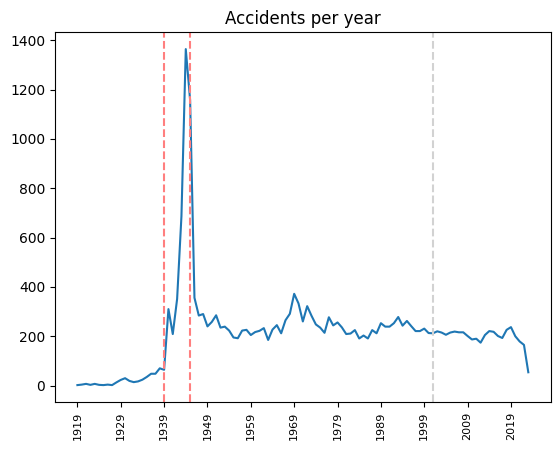

In [ ]:
import matplotlib.pyplot as plt

df_date_year.index = df_date_year.index.astype(int)

plt.title("Accidents per year")
plt.plot(df_date_year.index,df_date_year["accidents"])
plt.xticks(range(df_date_year.index.min(),df_date_year.index.max(),10),fontsize=8,rotation=90)
plt.axvline(x=1939,c="#ff7f7f",linestyle="--")
plt.axvline(x=1945,c="#ff7f7f",linestyle="--")
plt.axvline(x=2001,c="#d2d2d2",linestyle="--")
plt.show()

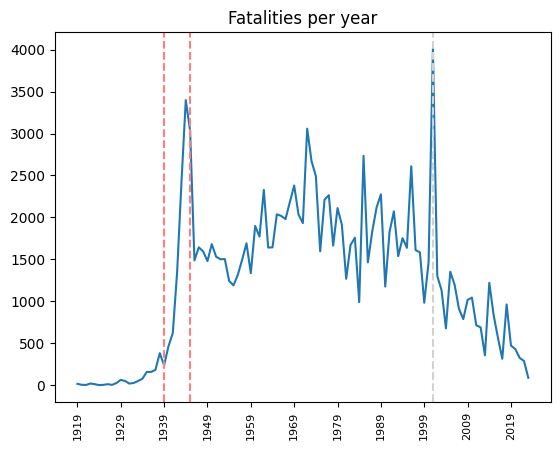

In [ ]:
plt.title("Fatalities per year")
plt.plot(df_date_year.index,df_date_year["fatalities"])
plt.xticks(range(df_date_year.index.min(),df_date_year.index.max(),10),fontsize=8,rotation=90)
plt.axvline(x=1939,c="#ff7f7f",linestyle="--")
plt.axvline(x=1945,c="#ff7f7f",linestyle="--")
plt.axvline(x=2001,c="#d2d2d2",linestyle="--")
plt.show()

Dai grafici appena mostrati emerge quanto segue:

- Entrambi i grafici registrano un picco di incidenti e vittime durante la Seconda Guerra Mondiale;
- Nel 2001 abbiamo un numero ancora più alto di vittime, ma non di incidenti (ricordiamo che negli attacchi dell'11 Settembre gli incidenti aerei sono stati tre);
- A parte un picco di minore intensità tra gli anni Sessanta e Settanta, il numero di incidenti è stato piuttosto stabile nel tempo, registrando una diminuzione dopo il 2019 (probabilmente dovuto alla pandemia da Covid-19);
- Il picco di moderata intensità descritto in precedenza è emerso anche nel grafico relativo al numero di vittime, che ha in seguito registrato un calo medio dei casi di morte (dovuto probabilmente al progresso tecnologico in aeronautica e all'aumento di leggi sulla sicurezza aerea).

Per quanto riguarda il mese, si è deciso di esaminare la media e non il totale di incidenti e vittime. Per fare questo, i dati sono stati prima sommati in base al mese e all'anno, poi si è calcolata la media mensile. I risultati sono stati salvati nel DataFrame *df_date_month*.

In [ ]:
df_date_month=df_date[["month","year","accidents","fatalities"]].groupby(["month","year"]).sum().reset_index(drop=False)
df_date_month=df_date_month[["month","accidents","fatalities"]].groupby("month").mean()
df_date_month

,accidents,fatalities
month,,
APR,18.968085,92.787234
AUG,18.158416,112.138614
DEC,20.639175,132.123711
FEB,17.829787,103.436170
JAN,20.510204,111.040816
JUL,20.489130,128.065217
JUN,19.020833,102.375000
MAR,20.371134,114.350515
MAY,20.354167,95.927083


I grafici a barre di seguito riportati ordinano i dati appena ottenuti in base al numero di incidenti e al numero di vittime.

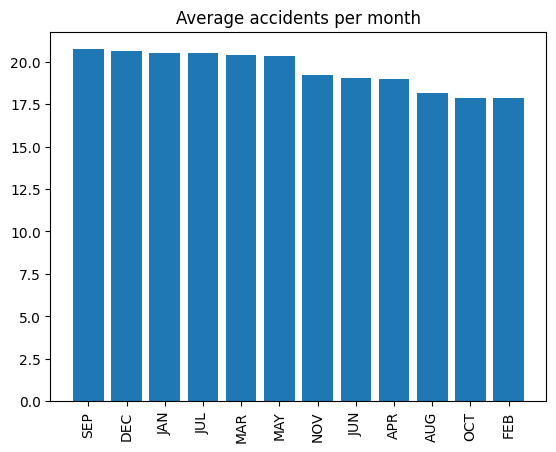

In [ ]:
df_date_month=df_date_month.sort_values(by="accidents",ascending=False)

plt.title("Average accidents per month")
plt.bar(df_date_month.index,df_date_month["accidents"])
plt.xticks(rotation=90)
plt.show()

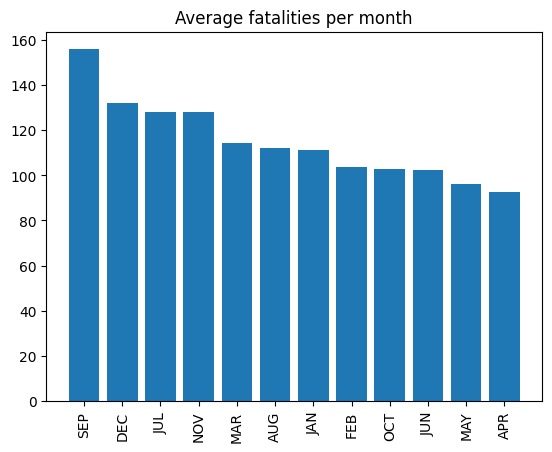

In [ ]:
df_date_month=df_date_month.sort_values(by="fatalities",ascending=False)

plt.title("Average fatalities per month")
plt.bar(df_date_month.index,df_date_month["fatalities"])
plt.xticks(rotation=90)
plt.show()

Da questi grafici osserviamo che:
- L'andamento stabile del numero di incidenti si è mantenuto anche nella media mensile, mentre il dislivello è più notevole nel numero medio di vittime;
- In entrambi i grafici, i tre mesi con la media più elevata di incidenti e vittime sono Settembre, Dicembre e Luglio. Questo primato può essere dovuto al maggior traffico aereo in questi periodi per il rientro dalle vacanze estive (Settembre), le vacanze invernali e di Natale (Dicembre) e l'inizio delle vacanze estive (Luglio);
- In particolare, nel caso del numero delle vittime, il mese di Settembre spicca sul resto dei mesi, probabilmente influenzato dagli attacchi dell'11 Settembre.

In modo analogo si è deciso di procedere per i giorni della settimana, raggruppando i dati prima in base al totale del giorno della settimana e dell'anno e poi calcolandone la media in base al giorno della settimana. I dati sono stati salvati nel DataFrame *df_date_day*.

In [ ]:
df_date_day=df_date[["weekday","year","accidents","fatalities"]].groupby(["weekday","year"]).sum().reset_index(drop=False)
df_date_day=df_date_day[["weekday","accidents","fatalities"]].groupby("weekday").mean()
df_date_day

,accidents,fatalities
weekday,,
Friday,35.868687,190.434343
Monday,32.731959,184.134021
Saturday,30.356436,176.772277
Sunday,26.767677,187.171717
Thursday,34.418367,178.918367
Tuesday,33.070000,216.840000
Wednesday,33.540000,199.950000


I grafici a barre di seguito riportati mostrano il numero medio di incidenti e vittime in base al giorno della settimana, ordinati in modo decrescente.

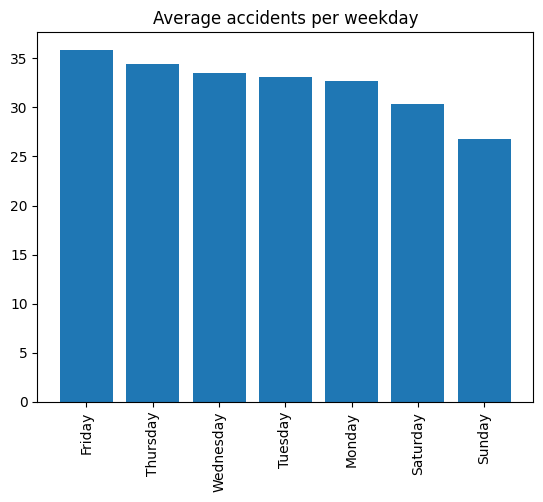

In [ ]:
df_date_day=df_date_day.sort_values(by="accidents",ascending=False)

plt.title("Average accidents per weekday")
plt.bar(df_date_day.index,df_date_day["accidents"])
plt.xticks(rotation=90)
plt.show()

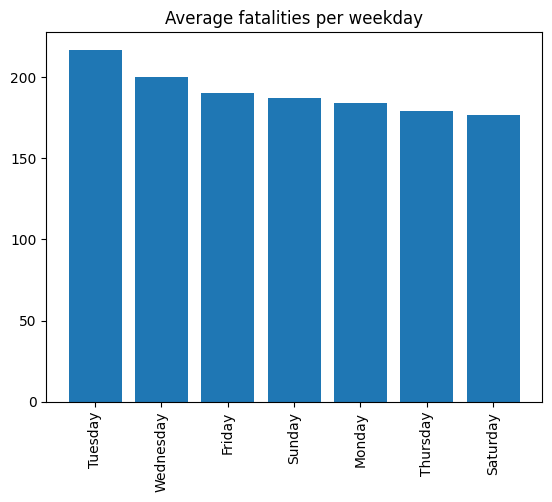

In [ ]:
df_date_day=df_date_day.sort_values(by="fatalities",ascending=False)

plt.title("Average fatalities per weekday")
plt.bar(df_date_day.index,df_date_day["fatalities"])
plt.xticks(rotation=90)
plt.show()

Dai grafici si osserva quanto segue:
- Il numero medio di incidenti aumenta dal lunedì al venerdì, mentre diminuisce nel finesettimana, mentre questa tendenza non si registra con il numero medio di vittime;
- La media più alta del numero di vittime si è registrata il martedì e spicca sul resto dei giorni della settimana. Come nel caso della media mensile, possiamo ipotizzare che questo dato sia stato influenzato dagli attacchi dell'11 Settembre, che era appunto un martedì.

## Informazioni sul velivolo

In questa sezione sarà fornita una panoramica dei dati dal punto di vista delle informazioni sul velivolo. Ricordiamo che, nel dataset, queste informazioni sono date dalle colonne *operator* e *type*, che indicano rispettivamente l'operatore di linea e il modello di aereo.

Raggruppiamo questi dati in due DataFrame distinti, *df_operator* e *df_type*.

In [ ]:
df_operator=df[["operator","accidents","fatalities"]].groupby("operator").sum()
df_type=df[["type","accidents","fatalities"]].groupby("type").sum()

Le due celle seguenti riportano la media di incidenti e vittime per operatore e per modello.

In [ ]:
df_operator.mean()

,0
accidents,3.814664
fatalities,22.456042


In [ ]:
df_type.mean()

,0
accidents,7.144310
fatalities,42.056898


Entrambe le medie sono più alte per il tipo di veicolo piuttosto che per l'operatore. Ciò è probabilmente dovuto al maggiore numero di operatori di linea rispetto ai modelli disponibili.

Partiamo quindi dal raggruppamento degli operatori. Nelle due celle che seguono, i grafici a barre riportano i primi dieci operatori per numero di incidenti e vittime.

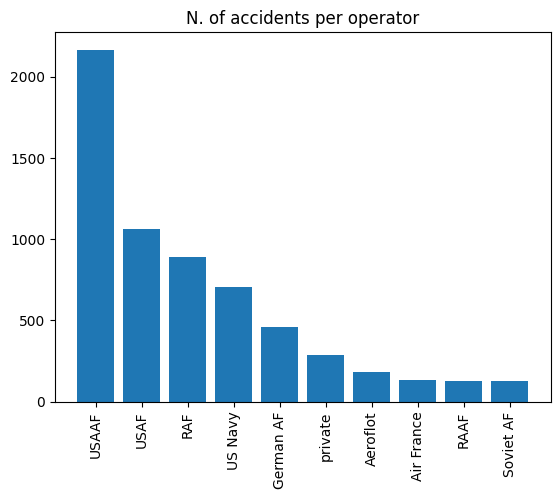

In [ ]:
df_operator_accidents=df_operator.sort_values(by="accidents",ascending=False).reset_index(drop=False)
df_operator_accidents=df_operator_accidents.iloc[:10]

plt.title("N. of accidents per operator")
plt.bar(df_operator_accidents["operator"],df_operator_accidents["accidents"])
plt.xticks(rotation=90)
plt.show()

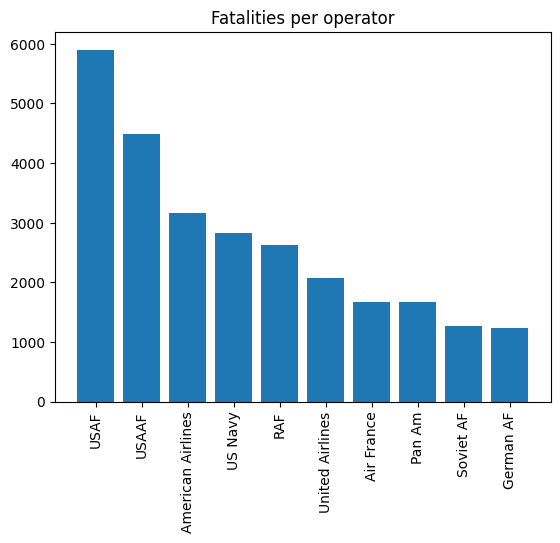

In [ ]:
df_operator_fatalities=df_operator.sort_values(by="fatalities",ascending=False).reset_index(drop=False)
df_operator_fatalities=df_operator_fatalities.iloc[:10]

plt.title("Fatalities per operator")
plt.bar(df_operator_fatalities["operator"],df_operator_fatalities["fatalities"])
plt.xticks(rotation=90)
plt.show()

Dai grafici appena riportati, possiamo osservare quanto segue:
- Il primato per numero di incidenti e vittime appartiene al United States Army Air Forces (USAAF) e al United States Air Force (USAF), che rappresentano entrambe la forza militare aerea degli Stati Uniti;
- I primi cinque operatori per numero di incidenti riguardano forze aeree militari di Stati Uniti, Inghilterra e Germania. Se uniamo questa informazione al picco di incidenti registrato tra il 1939 e il 1945, possiamo ipotizzare che la Seconda Guerra Mondiale abbia influenzato questo primato;
- Dei primi dieci operatori per numero di vittime, sei sono di bandiera statunitense. Questo dato è influenzato sia dallo sforzo bellico nella Seconda Guerra Mondiale (USAF, USAAF, US Navy) che dagli attacchi dell'11 Settembre (American Airlines, United Airlines).

Nelle due celle di seguito riportate, i grafici mostrano in modo analogo i primi dieci tipi di velivolo per numero di incidenti e vittime.

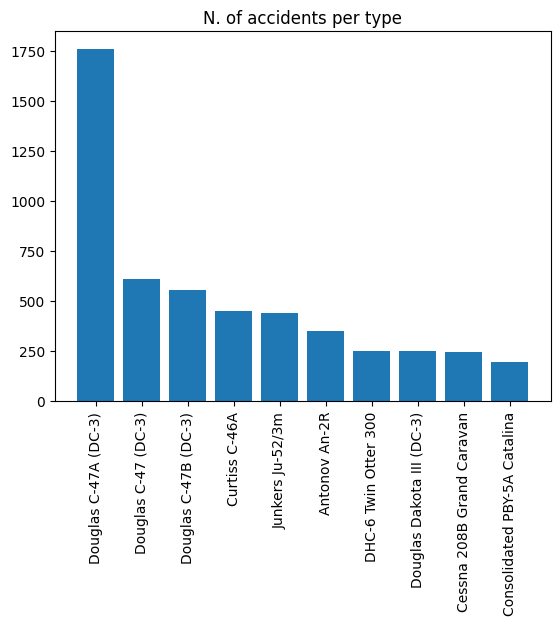

In [ ]:
df_type_accidents=df_type.sort_values(by="accidents",ascending=False).reset_index(drop=False)
df_type_accidents=df_type_accidents.iloc[:10]

plt.title("N. of accidents per type")
plt.bar(df_type_accidents["type"],df_type_accidents["accidents"])
plt.xticks(rotation=90)
plt.show()

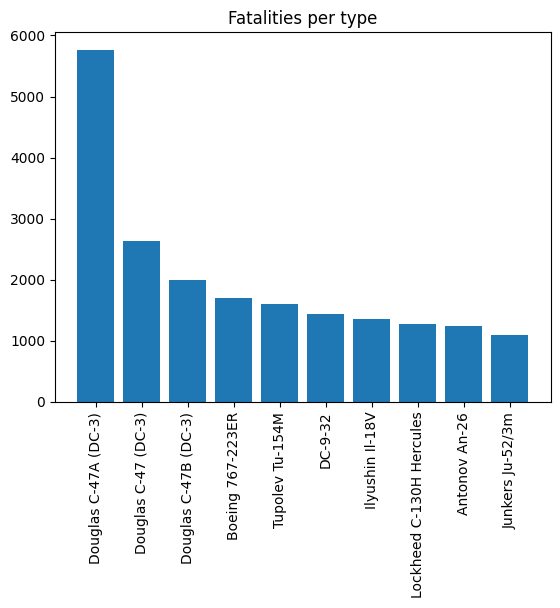

In [ ]:
df_type_fatalities=df_type.sort_values(by="fatalities",ascending=False).reset_index(drop=False)
df_type_fatalities=df_type_fatalities.iloc[:10]

plt.title("Fatalities per type")
plt.bar(df_type_fatalities["type"],df_type_fatalities["fatalities"])
plt.xticks(rotation=90)
plt.show()

Dai grafici osserviamo quanto segue:
- I primi tre modelli per numero di incidenti e di vittime sono varianti del Douglas C-47, impiegato soprattutto durante la Seconda Guerra Mondiale dalle Forze Alleate;
- Nel grafico relativo al numero di vittime, il quarto modello è dato dal Boeing-767, lo stesso modello degli aerei dirottati durante gli attacchi dell'11 Settembre.

## Panoramica geospaziale

In questa sezione si esploreranno i dati dal punto di vista geospaziale.

Come nelle sezioni precedenti, sommeremo il numero di incidenti e di vittime raggruppando i valori in base al paese.

In [ ]:
df_country=df[["country","accidents","fatalities"]].groupby("country").sum().reset_index(drop=False)
df_country

,country,accidents,fatalities
0,Afghanistan,111,951
1,Albania,6,15
2,Algeria,95,878
3,American Samoa,6,106
4,Angola,121,1042
...,...,...,...
225,Vietnam,311,2370
226,Western Sahara,6,13
227,Yemen,63,217
228,Zambia,19,78


Durante la creazione dei cartogrammi è emersa una discrepanza tra i nomi dei paesi riportati nei dati e quelli dei dati geospaziali per la costruzione delle mappe.

Per uniformare i valori, si è proceduto come segue:
1. I dati geospaziali sono stati importati nel DataFrame *df_reference*;
2. Tramite due join, sono stati individuati i paesi in cui si verifica la discrepanza appena descritta;
3. Sono state compilate manualmente due liste e i nomi nei dati forniti sono stati sostituiti dai nomi dei dati geospaziali.

In [ ]:
import requests

reference_geo_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
).json()

reference_list=[]
for i in range(len(reference_geo_data["features"])):
    reference_list.append(reference_geo_data["features"][i]["properties"]["name"])

df_reference=pd.DataFrame(reference_list).rename(columns={0:"country_official"})
df_reference

,country_official
0,Afghanistan
1,Angola
2,Albania
3,United Arab Emirates
4,Argentina
...,...
172,West Bank
173,Yemen
174,South Africa
175,Zambia


In [ ]:
country_missed=df_country[df_country["country"].isin(df_reference["country_official"])==False]
country_missed["country"].unique()

array(['American Samoa', 'Anguilla', 'Antigua', 'Arctic Ocean', 'Aruba',
       'Atlantic Ocean', 'B.V.I.', 'Bahamas', 'Bahrain', 'Barbados',
       'Bermuda', 'Bosnia', 'C.A.R.', 'Cape Verde',
       "Caribbean Neth'lands", 'Cayman Isl.', 'Christmas Isl.',
       'Cocos Isl.', 'Comoros', 'Congo', 'Cook Isl.', "Cote d'Ivoire",
       'CuraÃ§ao', 'Czech Rep.', 'D.R. Congo', 'Dominica',
       'Dominican Rep.', 'Eq. Guinea', 'Eswatini', 'Falkland Isl.',
       'French Guiana', 'French Polynesia', 'Gibraltar', 'Guadeloupe',
       'Guam', 'Guinea-Bissau', 'Hong Kong', 'Indian Ocean', 'Kiribati',
       'Macau', 'Maldives', 'Malta', 'Marshall Isl.', 'Martinique',
       'Mauritius', 'Mediterranean Sea', 'Micronesia', 'Monaco',
       'Montserrat', 'Norfolk Island', 'North Macedonia',
       'Northern Mariana Isl', 'P.N. Guinea', 'Pacific Ocean', 'Palau',
       'Reunion', 'Saint BarthÃ©lemy', 'Saint Lucia', 'Samoa', 'Sao Tome',
       'Serbia', 'Seychelles', 'Singapore', 'Sint Maarten',
  

In [ ]:
reference_missed=df_reference.merge(df_country,how="left",left_on="country_official",right_on="country")
reference_missed=reference_missed[reference_missed["country"].isna()]
reference_missed["country_official"].unique()

array(['United Arab Emirates', 'French Southern and Antarctic Lands',
       'The Bahamas', 'Bosnia and Herzegovina', 'Brunei',
       'Central African Republic', 'Ivory Coast',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Northern Cyprus', 'Czech Republic', 'Dominican Republic',
       'Falkland Islands', 'United Kingdom', 'Guinea Bissau',
       'Equatorial Guinea', 'Macedonia', 'Papua New Guinea',
       'Solomon Islands', 'Somaliland', 'Republic of Serbia', 'Swaziland',
       'East Timor', 'Trinidad and Tobago', 'United Republic of Tanzania',
       'United States of America', 'West Bank'], dtype=object)

In [ ]:
list_to_replace=['U.A.E.',
                 'Bahamas',
                 'Bosnia',
                 'C.A.R.',
                 "Cote d'Ivoire",
                 'D.R. Congo',
                 'Congo',
                 'Czech Rep.',
                 'Dominican Rep.',
                'Falkland Isl.',
                'U.K.',
                'Guinea-Bissau',
                'Eq. Guinea',
                 'North Macedonia',
                'P.N. Guinea',
                'Solomon Isl.',
                'Serbia',
                'Timor',
                'Trinidad & Tobago',
                'Tanzania',
                'USA']
list_new_values=['United Arab Emirates',
                 'The Bahamas',
                 'Bosnia and Herzegovina',
                 'Central African Republic',
                 'Ivory Coast',
                 'Democratic Republic of the Congo',
                 'Republic of the Congo',
                 'Czech Republic',
                 'Dominican Republic',
                 'Falkland Islands',
                 'United Kingdom',
                 'Guinea Bissau',
                 'Equatorial Guinea',
                 'Macedonia',
                 'Papua New Guinea',
                 'Solomon Islands',
                 'Republic of Serbia',
                 'East Timor',
                 'Trinidad and Tobago',
                 'United Republic of Tanzania',
                 'United States of America']

df_country=df_country.replace(list_to_replace,list_new_values)
df_country

,country,accidents,fatalities
0,Afghanistan,111,951
1,Albania,6,15
2,Algeria,95,878
3,American Samoa,6,106
4,Angola,121,1042
...,...,...,...
225,Vietnam,311,2370
226,Western Sahara,6,13
227,Yemen,63,217
228,Zambia,19,78


Tramite la libreria *folium*, nelle celle seguenti sono stati tracciati i cartogrammi per numero di incidenti e di vittime. I paesi colorati in grigio scuro sono quelli dove non è stato possibile effettuare la sostituzione con i dati geospaziali.

In [ ]:
import folium

m_accidents = folium.Map()

folium.Choropleth(
    geo_data=reference_geo_data,
    data=df_country,
    columns=["country", "accidents"],
    key_on="feature.properties.name"
).add_to(m_accidents)

m_accidents

In [ ]:
m_fatalities = folium.Map()

folium.Choropleth(
    geo_data=reference_geo_data,
    data=df_country,
    columns=["country", "fatalities"],
    key_on="feature.properties.name"
).add_to(m_fatalities)

m_fatalities

I due cartogrammi si somigliano molto in termini di colorazione ed emerge un primato negli Stati Uniti per numero di incidenti e di vittime. Si osservi però anche un elevato numero di vittime anche in Russia.

## Categorie di incidente

In questa sezione ci occuperemo di una panoramica dei dati in base alle categorie di incidente.

Queste categorie sono state definite dall'Aviation Safety Network ([rimandiamo qui per un approfondimento](https://asn.flightsafety.org/database/legend.php)) e sono costituite da stringhe di due caratteri:
- Il primo carattere è una lettera che indica la causa dell'incidente;
- Il secondo carattere è un numero che indica i danni riportati dal velivolo.

Per iniziare questa analisi abbiamo ripreso le colonne *cat*, *accidents* e *fatalities* dal dataset originale e le abbiamo salvate nel DataFrame *df_cat*.

In [ ]:
df_cat=df[["cat","accidents","fatalities"]]
df_cat

,cat,accidents,fatalities
0,A1,1,14
1,A1,1,1
2,A1,1,0
3,A1,1,0
4,A1,1,0
...,...,...,...
22471,A2,1,0
22472,A2,1,0
22473,A1,1,0
22474,A2,1,0


Al DataFrame abbiamo aggiunto le colonne *alphabet* e *number*, che riportano la categoria alfabetica e numerica dell'incidente.

In [ ]:
df_cat["alphabet"]=df_cat["cat"].astype(str).str[0]
df_cat["number"]=df_cat["cat"].astype(str).str[1]

<ipython-input-50-4c3f305425bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["alphabet"]=df_cat["cat"].astype(str).str[0]
<ipython-input-50-4c3f305425bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["number"]=df_cat["cat"].astype(str).str[1]


Da questo DataFrame sono stati ottenute tre tabelle:
- Il DataFrame *df_cat_asn* che raggruppa i dati in base alla categoria ASN nella sua interezza;
- Il DataFrame *df_cat_alphabet* che raggruppa i dati in base alla categoria alfabetica;
- Il DataFrame *df_cat_number* che raggruppa i dati in base alla categoria numerica.

In [ ]:
df_cat_asn=df_cat[["cat","accidents","fatalities"]].groupby("cat").sum()
df_cat_alphabet=df_cat[["alphabet","accidents","fatalities"]].groupby("alphabet").sum()
df_cat_number=df_cat[["number","accidents","fatalities"]].groupby("number").sum()

I grafici a barre ottenuti dalle due celle sottostanti riportano il numero di incidenti e di vittime per categoria alfabetica.

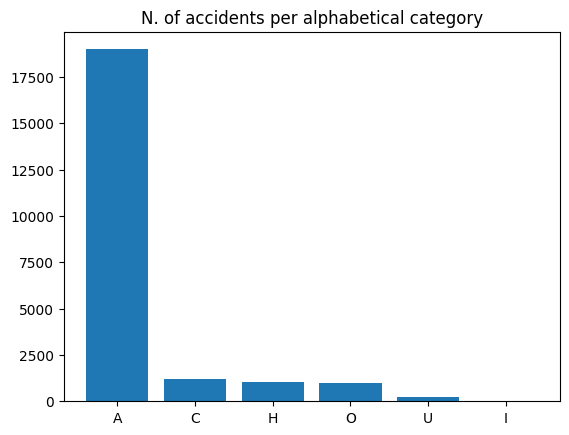

In [ ]:
df_alphabet_accidents=df_cat_alphabet.sort_values(by="accidents",ascending=False).reset_index(drop=False)

plt.title("N. of accidents per alphabetical category")
plt.bar(df_alphabet_accidents["alphabet"],df_alphabet_accidents["accidents"])
plt.show()

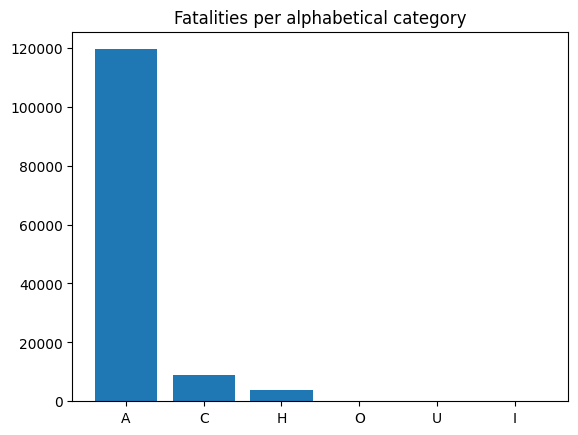

In [ ]:
df_alphabet_fatalities=df_cat_alphabet.sort_values(by="fatalities",ascending=False).reset_index(drop=False)

plt.title("Fatalities per alphabetical category")
plt.bar(df_alphabet_accidents["alphabet"],df_alphabet_accidents["fatalities"])
plt.show()

Notiamo che in entrambi i grafici le cause più comuni sono accidentali (ossia non intenzionali e che hanno riportato danni a persone o cose), di natura criminale (l'incidente è conseguenza di un atto criminale come il sabotaggio o l'abbattimento in volo) e il dirottamento (l'incidente è stato intenzionale e conseguenza di una deviazione criminale dalla rotta prevista). Nel secondo grafico emergono però categorie dove non ci sono state vittime.

In modo analogo, nei grafici ottenuti dalle celle sottostanti sono riportati il numero di incidenti e di vittime per categoria numerica.

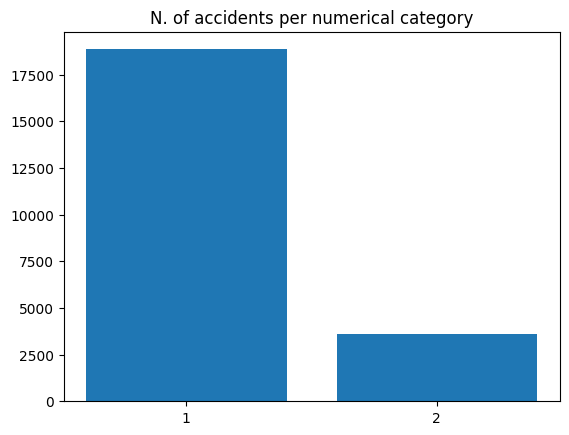

In [ ]:
df_number_accidents=df_cat_number.sort_values(by="accidents",ascending=False).reset_index(drop=False)

plt.title("N. of accidents per numerical category")
plt.bar(df_number_accidents["number"],df_number_accidents["accidents"])
plt.show()

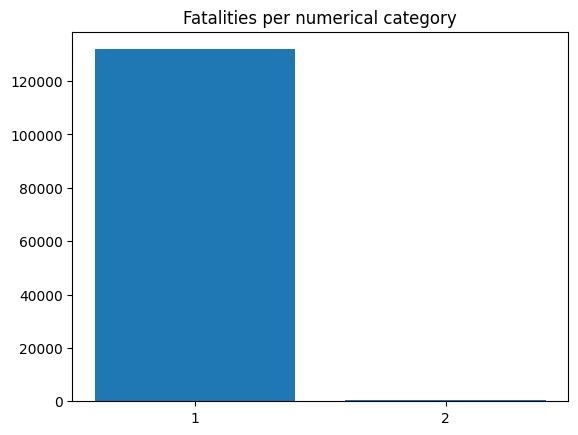

In [ ]:
df_number_fatalities=df_cat_number.sort_values(by="fatalities",ascending=False).reset_index(drop=False)

plt.title("Fatalities per numerical category")
plt.bar(df_number_fatalities["number"],df_number_fatalities["fatalities"])
plt.show()

La categoria 1, che contrassegna gli incidenti dove il velivolo è andato completamente distrutto, spicca sulla categoria 2 sia in termini di incidenti che di vittime.

Infine, i due grafici seguenti mostrano il numero di incidenti e di vittime in base alla categoria ASN nella sua interezza

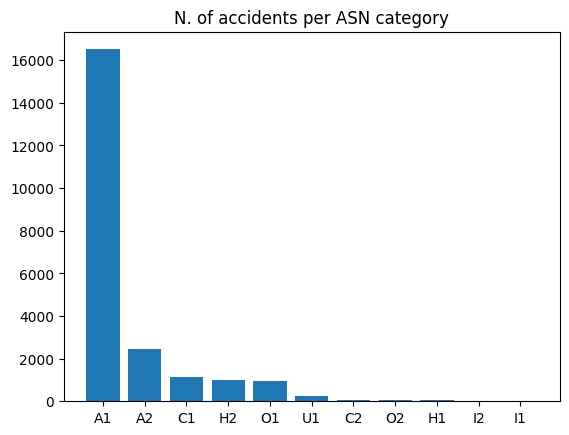

In [ ]:
df_asn_accidents=df_cat_asn.sort_values(by="accidents",ascending=False).reset_index(drop=False)

plt.title("N. of accidents per ASN category")
plt.bar(df_asn_accidents["cat"],df_asn_accidents["accidents"])
plt.show()

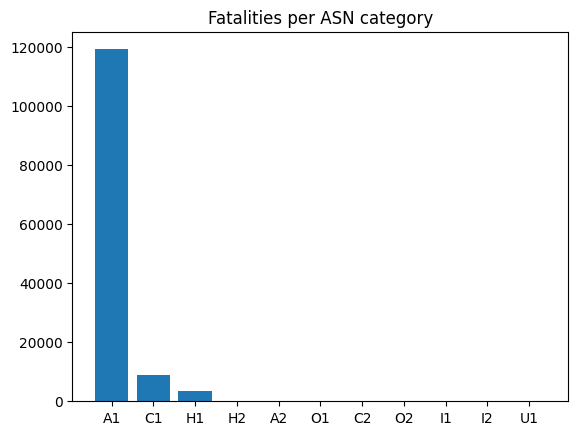

In [ ]:
df_asn_accidents=df_cat_asn.sort_values(by="fatalities",ascending=False).reset_index(drop=False)

plt.title("Fatalities per ASN category")
plt.bar(df_asn_accidents["cat"],df_asn_accidents["fatalities"])
plt.show()

Osserviamo quanto segue:
- Il numero maggiore di incidenti sono stati accidentali, al di là della perdita o meno del velivolo, seguiti dagli atti criminali con perdita del velivolo (C1), dai dirottamenti con danni al velivolo (H2) e da cause terze con perdita del velivolo (O1);
- Il numero maggiore di vittime è avvenuto negli incidenti in cui il velivolo è andato distrutto e, più nello specifico, sono stati accidentali (A1), di natura criminale (C1) o dovuti a dirottamenti (H1).

## Conclusioni

Su richiesta dell'International Alliance for Safe Skies (IASS), questo notebook presenta un'analisi sui disastri aerei avvenuti tra il 1919 e il 2023.

La prima sezione è stata dedicata all'importazione e alla preparazione dei dati per l'analisi. Dopo aver constatato la presenza di dati parziali analizzati nella seconda sezione, si è deciso di procedere con i record che presentavano una completezza dei dati in tutte le colonne selezionate.

La terza sezione riguardava l'analisi degli incidenti e delle vittime dal punto di vista del tempo. In particolare, dopo una panoramica storica negli anni, sono state esaminate le medie di incidenti e vittime dal punto di vista del mese e del giorno della settimana, osservando un'influenza da parte dei dati relativi agli attacchi dell'11 Settembre.

Nella quarta sezione sono state prese in considerazione le informazioni sul velivolo, in particolare sull'operatore e sul tipo di veicolo. Anche qui è emersa un'influenza nei dati sia dagli attacchi dell'11 Settembre sia dalla Seconda Guerra Mondiale.

Nella quinta sezione è stata offerta una panoramica dal punto di vista geospaziale, costruendo due cartogrammi per numero di incidenti e di vittime e osservano un primato negli Stati Uniti d'America.

Nella sesta e ultima sezione sono state analizzate le categorie ASN degli incidenti. Dopo una panoramica in base alle categorie alfabetiche e numeriche, i dati sono stati esaminati in base alle categorie nella loro interezza, osservando una prevalenza di disastri di natura accidentale con perdita totale del velivolo.